In [97]:
from tihmdri.clean import LoadData
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as patches


In [2]:
input_path = '/Users/eyalsoreq/GoogleDrive/Projects/OnGoing/DRI/Data/'
output_path = '/Users/eyalsoreq/github/data/'
datasets = ['15','dri']
tihm = LoadData(input_path,output_path,datasets)

Loading previously parsed merged file in 5.87 seconds


In [3]:
tihm.domains

['flags',
 'sleep',
 'physiology',
 'wellbeing',
 'location',
 'demographics',
 'movement',
 'activity',
 'clinical',
 'doors',
 'appliances',
 'temperature',
 'light',
 'sleep_disturbance']

In [224]:
df = tihm.activity.copy().drop(columns='project').set_index('datetimeObserved').sort_index()
df1 = df[df.subject>1000]
df1 = df1.groupby(['subject']).resample('1D').sum().drop(columns='subject')
df1 = df1.sum(axis=1).reset_index().set_index('datetimeObserved')
df1 = df1.reset_index().rename(columns={0:'activity'})
df1


,datetimeObserved,subject,activity
0,2019-06-27,1015,345.0
1,2019-06-28,1015,465.0
2,2019-06-29,1015,378.0
3,2019-06-30,1015,405.0
4,2019-07-01,1015,433.0
...,...,...,...
23568,2020-11-05,1315,522.0
23569,2020-11-06,1315,413.0
23570,2020-11-07,1315,417.0
23571,2020-11-08,1315,396.0


<AxesSubplot:xlabel='datetimeObserved', ylabel='activity'>

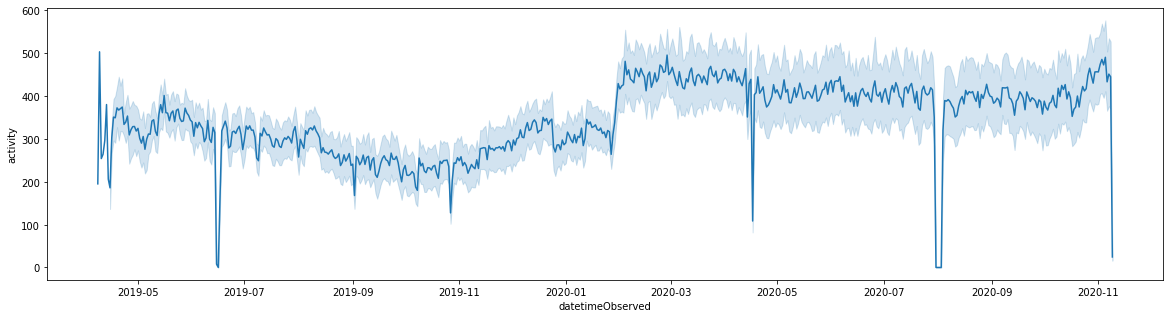

In [226]:
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=df1,x='datetimeObserved',y='activity')

<AxesSubplot:xlabel='datetimeObserved', ylabel='activity'>

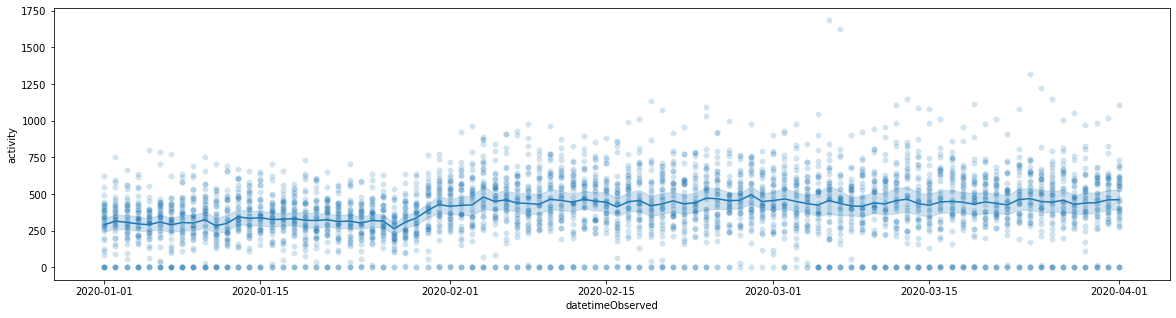

In [227]:
df1 = df1.set_index('datetimeObserved').sort_index()["2020-01-01":"2020-04-01"]
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=df1.reset_index(),x='datetimeObserved',y='activity')
sns.scatterplot(ax=ax,data=df1.reset_index(),x='datetimeObserved',y='activity',alpha=0.2)

<AxesSubplot:xlabel='datetimeObserved', ylabel='activity'>

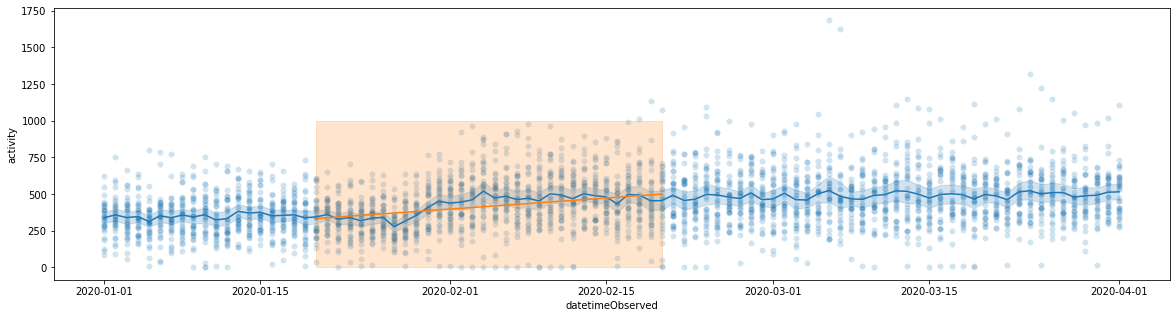

In [228]:
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=df1[df1.activity!=0].reset_index(),x='datetimeObserved',y='activity')
sns.scatterplot(ax=ax,data=df1[df1.activity!=0].reset_index(),x='datetimeObserved',y='activity',alpha=0.2)
sns.lineplot(ax=ax,x=pd.to_datetime(["2020-01-20","2020-01-20","2020-02-20","2020-02-20","2020-01-20"]),y = [0,1000,1000,0,0])

In [229]:
df1 = df1["2020-01-20":"2020-02-20"]
df1 = df1.pivot(columns = 'subject',values='activity')

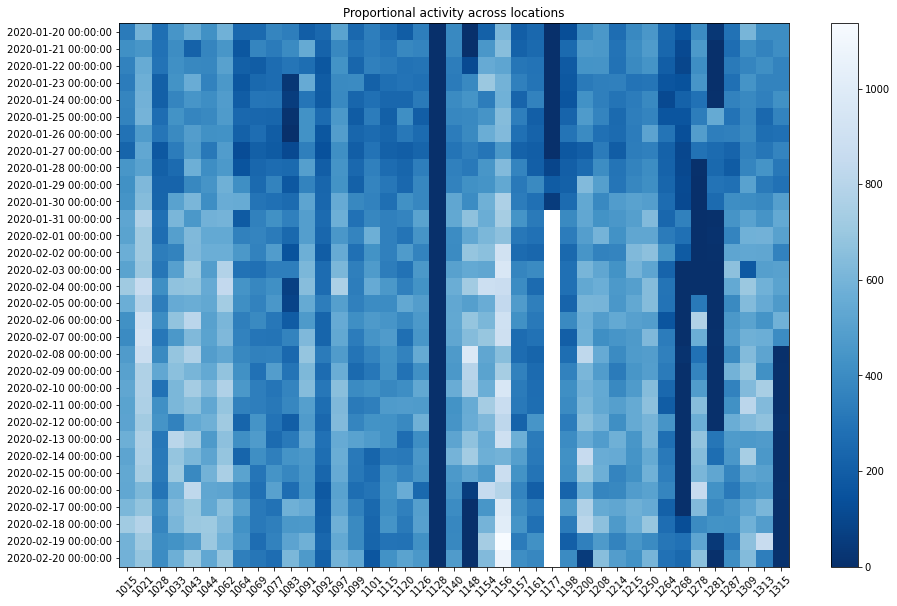

In [230]:
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.values, cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[1]))
ax.set_xticklabels(df1.columns,rotation=45)
ax.set_yticks(range(df1.shape[0]))
ax.set_yticklabels(df1.index)
ax.set_title('Proportional activity across locations')
plt.show() 

In [231]:
ix = np.argsort(df1.sum(axis=0))
df1 = df1[df1.columns[ix]]
df1

subject,1128,1177,1268,1281,1092,1315,1264,1083,1198,1161,...,1033,1250,1097,1309,1200,1154,1043,1062,1021,1156
datetimeObserved,,,,,,,,,,,,,,,,,,,,,
2020-01-20,0.0,0.0,158.0,35.0,245.0,405.0,253.0,342.0,130.0,246.0,...,448.0,457.0,512.0,606.0,396.0,216.0,548.0,586.0,595.0,611.0
2020-01-21,0.0,0.0,115.0,0.0,224.0,409.0,244.0,396.0,255.0,256.0,...,406.0,473.0,384.0,416.0,470.0,454.0,218.0,452.0,452.0,652.0
2020-01-22,0.0,0.0,102.0,4.0,173.0,366.0,203.0,304.0,186.0,294.0,...,419.0,436.0,434.0,375.0,437.0,555.0,386.0,505.0,559.0,528.0
2020-01-23,0.0,0.0,149.0,0.0,191.0,365.0,163.0,35.0,177.0,299.0,...,434.0,304.0,394.0,436.0,325.0,703.0,560.0,461.0,575.0,595.0
2020-01-24,0.0,0.0,222.0,7.0,187.0,425.0,112.0,60.0,160.0,361.0,...,376.0,388.0,390.0,387.0,429.0,341.0,447.0,480.0,587.0,583.0
2020-01-25,0.0,0.0,160.0,549.0,260.0,366.0,164.0,16.0,227.0,208.0,...,435.0,372.0,458.0,380.0,475.0,443.0,376.0,475.0,598.0,640.0
2020-01-26,0.0,0.0,134.0,345.0,172.0,282.0,301.0,0.0,301.0,224.0,...,391.0,518.0,485.0,394.0,398.0,568.0,486.0,428.0,474.0,633.0
2020-01-27,0.0,0.0,106.0,261.0,145.0,371.0,222.0,114.0,177.0,202.0,...,337.0,354.0,414.0,356.0,202.0,304.0,467.0,482.0,533.0,459.0
2020-01-28,0.0,96.0,108.0,249.0,203.0,318.0,225.0,254.0,206.0,208.0,...,258.0,408.0,437.0,375.0,262.0,453.0,576.0,463.0,509.0,634.0


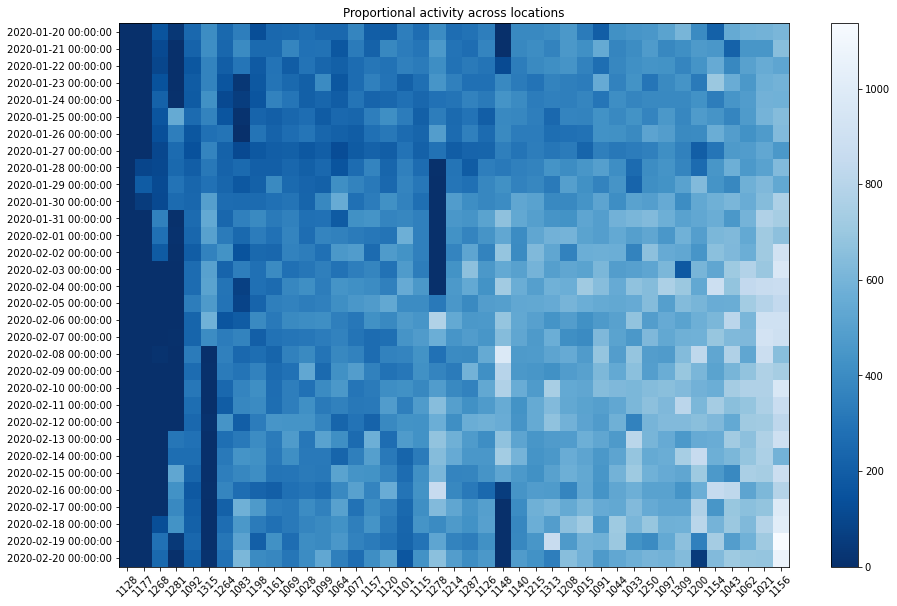

In [232]:
ix = np.argsort(df1.sum(axis=0))
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.fillna(0).values, cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[1]))
ax.set_xticklabels(df1.columns,rotation=45)
ax.set_yticks(range(df1.shape[0]))
ax.set_yticklabels(df1.index)
ax.set_title('Proportional activity across locations')
plt.show() 

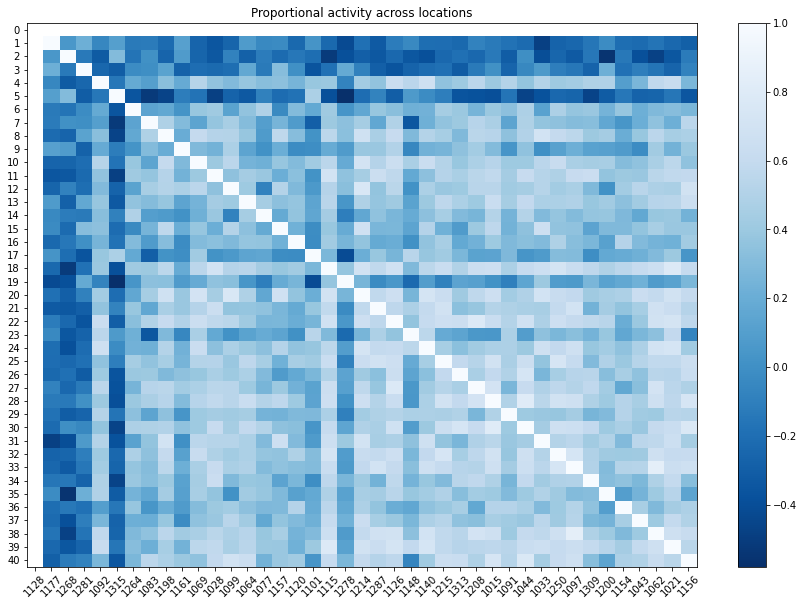

In [215]:
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.fillna(0).corr(), cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[1]))
ax.set_xticklabels(df1.columns,rotation=45)
ax.set_yticks(range(df1.shape[1]))
ax.set_yticklabels(df1.columns)
ax.set_title('Proportional activity across locations')
plt.show() 

In [233]:
df1 = df1.drop(columns=[1128,1177,1268,1281,1315])
valid_subj = df1.columns

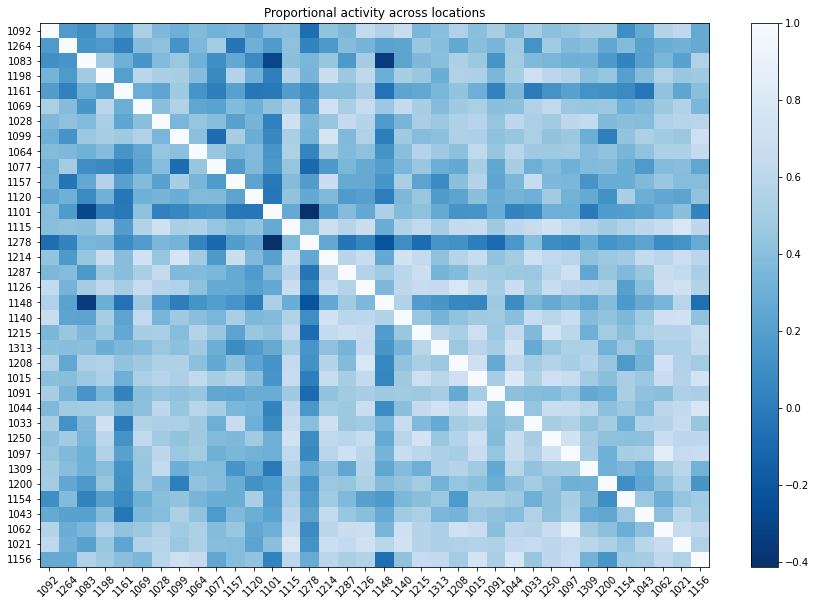

In [234]:
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.corr(), cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[1]))
ax.set_xticklabels(df1.columns,rotation=45)
ax.set_yticks(range(df1.shape[1]))
ax.set_yticklabels(df1.columns)
ax.set_title('Proportional activity across locations')
plt.show() 

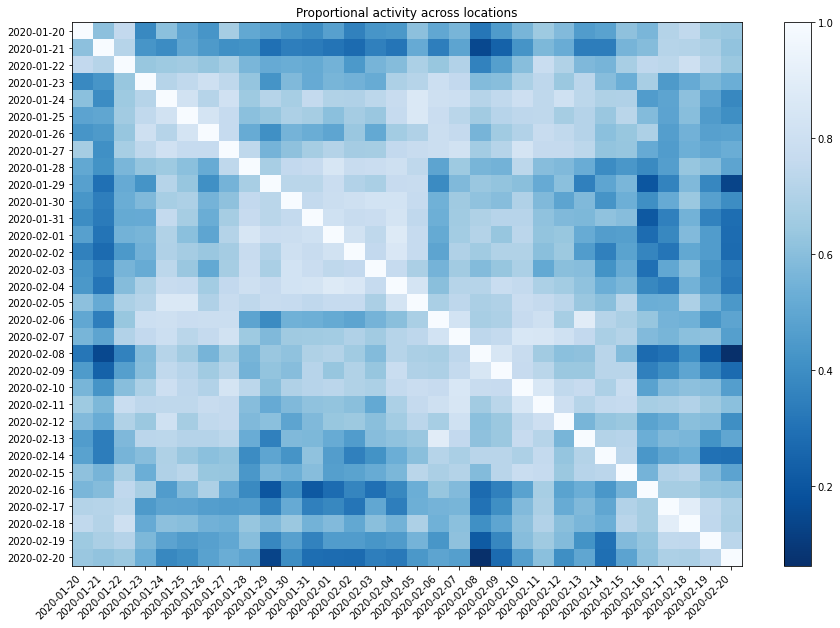

In [222]:
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.T.corr(), cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[0]))
xticks = [x.replace(" 00:00:00","") for x in df1.index.astype(str)]
ax.set_xticklabels(xticks,rotation=45,ha="right")
ax.set_yticks(range(df1.shape[0]))
ax.set_yticklabels(xticks)
ax.set_title('Proportional activity across locations')
plt.show() 

In [237]:
df1 = df[df.subject.isin(valid_subj)]
df1 = df1["2020-01-20":"2020-02-20"]
df1 = df1.groupby(['subject']).resample('1D').sum().drop(columns='subject')
df1

Back Door  Bathroom  Bedroom  Fridge Door  \
subject datetimeObserved                                              
1015    2020-01-20              0.0      37.0     38.0          0.0   
        2020-01-21              0.0      30.0     64.0          0.0   
        2020-01-22              0.0      18.0     56.0          0.0   
        2020-01-23              0.0      33.0     56.0          0.0   
        2020-01-24              0.0      21.0     66.0          0.0   
...                             ...       ...      ...          ...   
1313    2020-02-16             17.0      18.0     66.0         45.0   
        2020-02-17             38.0      21.0     61.0         57.0   
        2020-02-18             14.0      25.0     67.0         30.0   
        2020-02-19             36.0      37.0     62.0         59.0   
        2020-02-20             10.0      14.0     41.0         30.0   

                          Front Door  Hallway  Kettle  Kitchen  Lounge  Oven  
subject datetimeObserved                                                      
1015    2020-01-20              13.0     69.0    12.0     83.0    76.0   4.0  
        2020-01-21              16.0     69.0     8.0    120.0   109.0   4.0  
        2020-01-22              11.0     43.0     7.0    116.0   113.0   0.0  
        2020-01-23               8.0     54.0     5.0     97.0    83.0   1.0  
        2020-01-24               7.0     50.0     7.0    101.0   121.0   2.0  
...                              ...      ...     ...      ...     ...   ...  
1313    2020-02-16               0.0     25.0     0.0    197.0   103.0   4.0  
        2020-02-17              12.0     28.0     0.0    245.0   145.0   5.0  
        2020-02-18               9.0     27.0     0.0    160.0   145.0  10.0  
        2020-02-19              44.0     77.0     0.0    438.0   107.0   6.0  
        2020-02-20               9.0     30.0     0.0    136.0    70.0   2.0  

[1146 rows x 10 columns]

In [238]:
from scipy.stats import zscore
df1.groupby('subject').transform(lambda x : zscore(x,ddof=1))


Back Door  Bathroom   Bedroom  Fridge Door  \
subject datetimeObserved                                               
1015    2020-01-20              NaN -0.058657 -1.671908          NaN   
        2020-01-21              NaN -0.715616 -0.602710          NaN   
        2020-01-22              NaN -1.841832 -0.931694          NaN   
        2020-01-23              NaN -0.434062 -0.931694          NaN   
        2020-01-24              NaN -1.560278 -0.520463          NaN   
...                             ...       ...       ...          ...   
1313    2020-02-16         0.235042 -0.806712 -0.019879     0.572819   
        2020-02-17         2.742153 -0.436165 -0.196577     1.914054   
        2020-02-18        -0.123117  0.057898  0.015461    -1.103725   
        2020-02-19         2.503381  1.540087 -0.161238     2.137594   
        2020-02-20        -0.600662 -1.300775 -0.903373    -1.103725   

                          Front Door   Hallway    Kettle   Kitchen    Lounge  \
subject datetimeObserved                                                       
1015    2020-01-20          0.616912 -0.194276  2.929660 -1.380785 -1.797008   
        2020-01-21          1.289907 -0.194276  1.016413 -0.496605 -0.828330   
        2020-01-22          0.168249 -1.530120  0.538101 -0.592192 -0.710914   
        2020-01-23         -0.504746 -0.964955 -0.418523 -1.046230 -1.591531   
        2020-01-24         -0.729078 -1.170470  0.538101 -0.950643 -0.476083   
...                              ...       ...       ...       ...       ...   
1313    2020-02-16         -1.359452 -0.597969       NaN  0.183801 -0.008623   
        2020-02-17          0.246793 -0.354728       NaN  0.823980  1.440014   
        2020-02-18         -0.154768 -0.435808       NaN -0.309670  1.440014   
        2020-02-19          4.530111  3.618222       NaN  3.398034  0.129343   
        2020-02-20         -0.154768 -0.192566       NaN -0.629759 -1.146838   

                              Oven  
subject datetimeObserved            
1015    2020-01-20        1.827708  
        2020-01-21        1.827708  
        2020-01-22       -1.096625  
        2020-01-23       -0.365542  
        2020-01-24        0.365542  
...                            ...  
1313    2020-02-16        0.126603  
        2020-02-17        0.531732  
        2020-02-18        2.557378  
        2020-02-19        0.936861  
        2020-02-20       -0.683656  

[1146 rows x 10 columns]

In [239]:
df1 = df1.groupby('subject').transform(lambda x : zscore(x,ddof=1)).sum(axis=1).reset_index().set_index('datetimeObserved')
df1 = df1.reset_index().rename(columns={0:'activity'})
df1

,datetimeObserved,subject,activity
0,2020-01-20,1015,0.271647
1,2020-01-21,1015,1.296492
2,2020-01-22,1015,-5.997027
3,2020-01-23,1015,-6.257283
4,2020-01-24,1015,-4.503373
...,...,...,...
1141,2020-02-16,1313,-1.674369
1142,2020-02-17,1313,6.711257
1143,2020-02-18,1313,1.943663
1144,2020-02-19,1313,18.632394


<AxesSubplot:xlabel='datetimeObserved', ylabel='activity'>

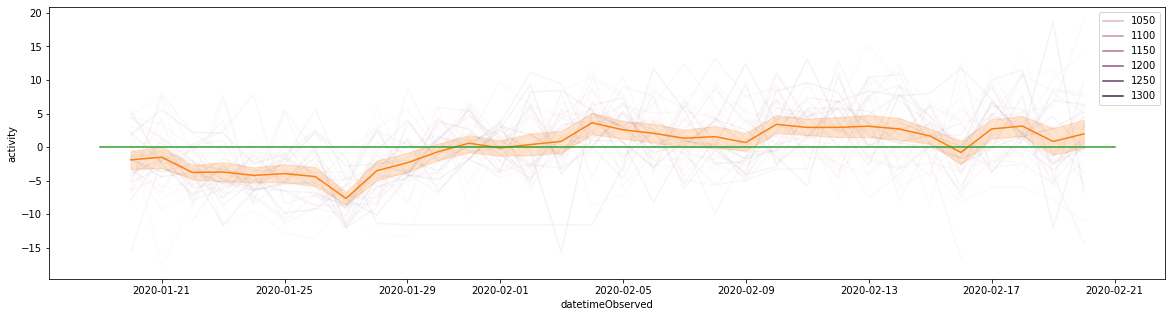

In [246]:
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=df1,x='datetimeObserved',y='activity',hue='subject',alpha=0.05)
sns.lineplot(ax=ax,data=df1,x='datetimeObserved',y='activity')
sns.lineplot(ax=ax,x=pd.to_datetime(["2020-01-19","2020-02-21"]),y=[0,0])


In [248]:
df1 = df[df.subject.isin(valid_subj)]
df1 = df1["2020-01-20":"2020-02-20"]
df1 = df1.groupby(['subject']).resample('1D').sum().drop(columns='subject')
df1 = df1.groupby('subject').transform(lambda x : zscore(x,ddof=1))
for 

Back Door  Bathroom   Bedroom  Fridge Door  \
subject datetimeObserved                                               
1015    2020-01-20              NaN -0.058657 -1.671908          NaN   
        2020-01-21              NaN -0.715616 -0.602710          NaN   
        2020-01-22              NaN -1.841832 -0.931694          NaN   
        2020-01-23              NaN -0.434062 -0.931694          NaN   
        2020-01-24              NaN -1.560278 -0.520463          NaN   
...                             ...       ...       ...          ...   
1313    2020-02-16         0.235042 -0.806712 -0.019879     0.572819   
        2020-02-17         2.742153 -0.436165 -0.196577     1.914054   
        2020-02-18        -0.123117  0.057898  0.015461    -1.103725   
        2020-02-19         2.503381  1.540087 -0.161238     2.137594   
        2020-02-20        -0.600662 -1.300775 -0.903373    -1.103725   

                          Front Door   Hallway    Kettle   Kitchen    Lounge  \
subject datetimeObserved                                                       
1015    2020-01-20          0.616912 -0.194276  2.929660 -1.380785 -1.797008   
        2020-01-21          1.289907 -0.194276  1.016413 -0.496605 -0.828330   
        2020-01-22          0.168249 -1.530120  0.538101 -0.592192 -0.710914   
        2020-01-23         -0.504746 -0.964955 -0.418523 -1.046230 -1.591531   
        2020-01-24         -0.729078 -1.170470  0.538101 -0.950643 -0.476083   
...                              ...       ...       ...       ...       ...   
1313    2020-02-16         -1.359452 -0.597969       NaN  0.183801 -0.008623   
        2020-02-17          0.246793 -0.354728       NaN  0.823980  1.440014   
        2020-02-18         -0.154768 -0.435808       NaN -0.309670  1.440014   
        2020-02-19          4.530111  3.618222       NaN  3.398034  0.129343   
        2020-02-20         -0.154768 -0.192566       NaN -0.629759 -1.146838   

                              Oven  
subject datetimeObserved            
1015    2020-01-20        1.827708  
        2020-01-21        1.827708  
        2020-01-22       -1.096625  
        2020-01-23       -0.365542  
        2020-01-24        0.365542  
...                            ...  
1313    2020-02-16        0.126603  
        2020-02-17        0.531732  
        2020-02-18        2.557378  
        2020-02-19        0.936861  
        2020-02-20       -0.683656  

[1146 rows x 10 columns]

In [ ]:
ix = np.argsort(df1.sum(axis=0))
fig,ax = plt.subplots(figsize=(15,10))
im = ax.imshow(df1.fillna(0).values, cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(df1.shape[1]))
ax.set_xticklabels(df1.columns,rotation=45)
ax.set_yticks(range(df1.shape[0]))
ax.set_yticklabels(df1.index)
ax.set_title('Proportional activity across locations')
plt.show() 

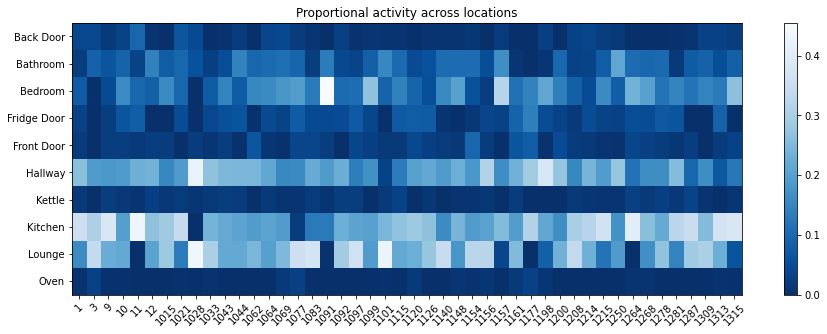

In [103]:

_df = df1.groupby('subject').mean().T
fig,ax = plt.subplots(figsize=(15,5))
im = ax.imshow(_df.values, cmap ="Blues_r",aspect="auto") 
plt.colorbar(im) 
ax.set_xticks(range(_df.shape[1]))
ax.set_xticklabels(_df.columns,rotation=45)
ax.set_yticks(range(_df.shape[0]))
ax.set_yticklabels(_df.index)
ax.set_title('Proportional activity across locations')
plt.show() 

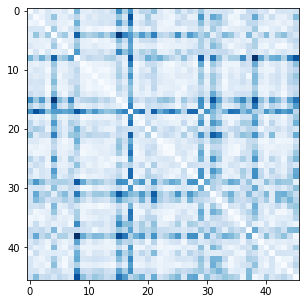

In [109]:


fig,ax = plt.subplots(figsize=(15,5))
im = ax.imshow(_df.corr(), cmap ="Blues_r") 

In [100]:
_df = df.loc["2020-01-19 00:00:00":"2020-02-09 00:00:00"]
_df = _df.drop(columns='project').groupby(['subject']).resample('1D').sum().drop(columns='subject')
_df = _df.stack().reset_index()
_df.columns = ['subject','date','location','activity']
_df = pd.pivot_table(_df,values="activity", index=["location","subject"], columns="date").reset_index()
_df

date,location,subject,2020-01-19 00:00:00,2020-01-20 00:00:00,2020-01-21 00:00:00,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,...,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00
0,Back Door,1,20.0,25.0,29.0,11.0,9.0,15.0,13.0,9.0,...,7.0,19.0,25.0,25.0,24.0,22.0,23.0,17.0,16.0,16.0
1,Back Door,3,9.0,11.0,12.0,10.0,5.0,7.0,8.0,18.0,...,11.0,26.0,26.0,10.0,5.0,9.0,2.0,7.0,8.0,21.0
2,Back Door,9,1.0,0.0,7.0,5.0,5.0,5.0,5.0,8.0,...,4.0,2.0,4.0,3.0,12.0,5.0,10.0,5.0,6.0,4.0
3,Back Door,10,14.0,26.0,17.0,27.0,18.0,15.0,37.0,21.0,...,23.0,24.0,23.0,24.0,19.0,33.0,20.0,21.0,27.0,28.0
4,Back Door,11,33.0,43.0,31.0,46.0,32.0,41.0,38.0,91.0,...,95.0,33.0,68.0,53.0,19.0,43.0,57.0,25.0,24.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Oven,1281,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
456,Oven,1287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,Oven,1309,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
458,Oven,1313,0.0,3.0,4.0,2.0,5.0,2.0,2.0,2.0,...,2.0,1.0,1.0,8.0,2.0,1.0,2.0,1.0,2.0,3.0


<AxesSubplot:xlabel='date', ylabel='activity'>

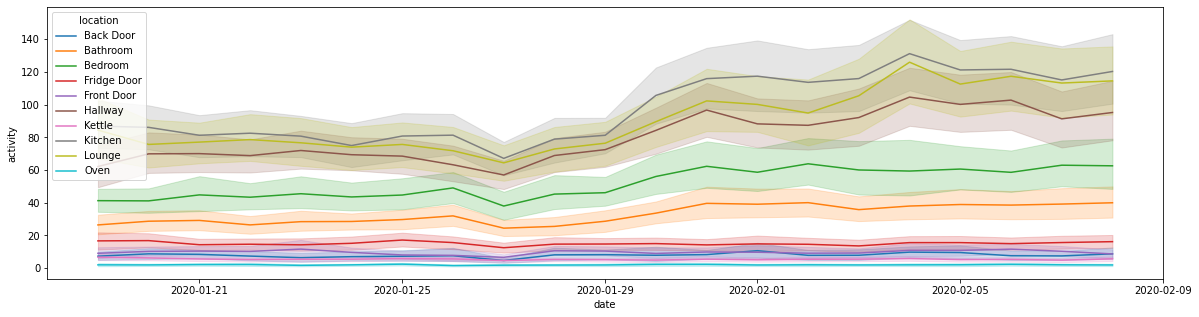

In [89]:
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(ax=ax,data=_df,x='date',y='activity',hue='location')


In [111]:
np.array([1,0,0,0,0]).reshape(5,1)@np.array([0,0,0,1,0]).reshape(1,5)

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [112]:
np.array([0,0,0,0,1]).reshape(5,1)@np.array([0,0,0,1,0]).reshape(1,5)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])